In [59]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns
import warnings
import urllib.request
import requests
%matplotlib inline

In [2]:
scores = pd.read_csv("scores.csv")

In [3]:
demographics = pd.read_csv("2017-18__-_2021-22_Demographic_Snapshot.csv")

In [4]:
scores.head(3)

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%


In [5]:
len(scores)

435

In [6]:
demographics.head(3)

,DBN,School Name,Year,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2017-18,190,0,17,28,32,33,23,...,0.032,0,0.0,49,0.258,8,0.042,161,84.7%,89.0%
1,01M015,P.S. 015 Roberto Clemente,2018-19,174,0,13,20,33,30,30,...,0.034,0,0.0,39,0.224,8,0.046,147,84.5%,88.8%
2,01M015,P.S. 015 Roberto Clemente,2019-20,190,0,14,29,28,38,33,...,0.047,0,0.0,46,0.242,17,0.089,155,81.6%,86.7%


In [7]:
len(demographics)

9251

In [8]:
data = scores.merge(demographics, how = "left", left_on = "School ID", right_on = "DBN", suffixes=('_x', '_y'))

In [9]:
data.head(3)

,School ID,School Name_x,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,0.641,19.0,0.031,101.0,0.167,2.0,0.003,86,14.2%,20.4%
1,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,0.636,21.0,0.029,120.0,0.165,2.0,0.003,125,17.2%,21.0%
2,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,0.647,22.0,0.028,129.0,0.166,0.0,0.000,133,17.1%,22.2%


In [10]:
len(data)

2095

In [11]:
data.columns

Index(['School ID', 'School Name_x', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'DBN', 'School Name_y',
       'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
   

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
data['# Asian']

0         76.0
1         92.0
2        100.0
3        108.0
4        112.0
5          6.0
6          2.0
7          2.0
8          2.0
9          2.0
10       575.0
11       584.0
12       615.0
13       624.0
14       582.0
15        21.0
16        22.0
17        24.0
18        30.0
19        24.0
20        27.0
21        25.0
22        26.0
23        28.0
24        27.0
25       341.0
26       366.0
27       367.0
28       366.0
29       343.0
30        19.0
31        19.0
32        27.0
33        30.0
34        44.0
35       167.0
36       178.0
37       163.0
38       152.0
39       129.0
40        11.0
41        19.0
42        22.0
43        26.0
44        33.0
45         NaN
46       141.0
47       178.0
48       187.0
49       182.0
50       178.0
51        28.0
52        22.0
53        26.0
54        31.0
55        29.0
56        43.0
57        26.0
58        28.0
59        50.0
60        58.0
61       386.0
62       395.0
63       418.0
64       394.0
65       370.0
66       1

In [14]:
asian_per_school = data[['School ID', '# Asian']].groupby(by='School ID', as_index=False).sum()
black_per_school = data[['School ID', '# Black']].groupby(by='School ID', as_index=False).sum()
hispanic_per_school = data[['School ID', '# Hispanic']].groupby(by='School ID', as_index=False).sum()
multi_per_school = data[['School ID', '# Multi-Racial']].groupby(by='School ID', as_index=False).sum()
native_per_school = data[['School ID', '# Native American']].groupby(by='School ID', as_index=False).sum()

# 1. Cleaning the Data (This section will be ever evolving. Whenever We realize that there needs some data cleaning, we should move those codes up to this section.)

## 1.1 Make sure that all the numeric fields are numeric, and get rid of the Nan in the data

In [15]:
data.columns

Index(['School ID', 'School Name_x', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'DBN', 'School Name_y',
       'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
   

In [16]:
data.head(3)

,School ID,School Name_x,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,0.641,19.0,0.031,101.0,0.167,2.0,0.003,86,14.2%,20.4%
1,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,0.636,21.0,0.029,120.0,0.165,2.0,0.003,125,17.2%,21.0%
2,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,0.647,22.0,0.028,129.0,0.166,0.0,0.000,133,17.1%,22.2%


In [17]:
# Convert data types to numeric
data['# Black'] = pd.to_numeric(data['# Black'], errors='coerce')
data['# Asian'] = pd.to_numeric(data['# Asian'], errors='coerce')
data['# Hispanic'] = pd.to_numeric(data['# Hispanic'], errors='coerce')
data['# Native American'] = pd.to_numeric(data['# Native American'], errors='coerce')
data['# Multi-Racial'] = pd.to_numeric(data['# Multi-Racial'], errors='coerce')
data['# Students with Disabilities'] = pd.to_numeric(data['# Students with Disabilities'], errors='coerce')
data['# Male'] = pd.to_numeric(data['# Male'], errors='coerce')
data['# Female'] = pd.to_numeric(data['# Female'], errors='coerce')
data['# Missing Race/Ethnicity Data'] = pd.to_numeric(data['# Missing Race/Ethnicity Data'], errors='coerce')
data['# English Language Learners'] = pd.to_numeric(data['# English Language Learners'], errors='coerce')
data['# Poverty'] = pd.to_numeric(data['# Poverty'], errors='coerce')


# Handle missing values if necessary
data = data.dropna()  # Drop rows with missing values
len(data)

1509

# 1. Draw different Bar Charts that show all schools' different minories' student numbers

In [18]:
asian_per_school.head(3)

,School ID,# Asian
0,01M292,139.0
1,01M448,866.0
2,01M450,334.0


In [19]:
black_per_school.head(3)

,School ID,# Black
0,01M292,297.0
1,01M448,469.0
2,01M450,534.0


In [20]:
hispanic_per_school.head(3)

,School ID,# Hispanic
0,01M292,671.0
1,01M448,1053.0
2,01M450,1858.0


In [21]:
multi_per_school.head(3)

,School ID,# Multi-Racial
0,01M292,2.0
1,01M448,10.0
2,01M450,49.0


In [22]:
native_per_school.head(3)

,School ID,# Native American
0,01M292,22.0
1,01M448,15.0
2,01M450,24.0


Text(0.5, 0, 'school id')

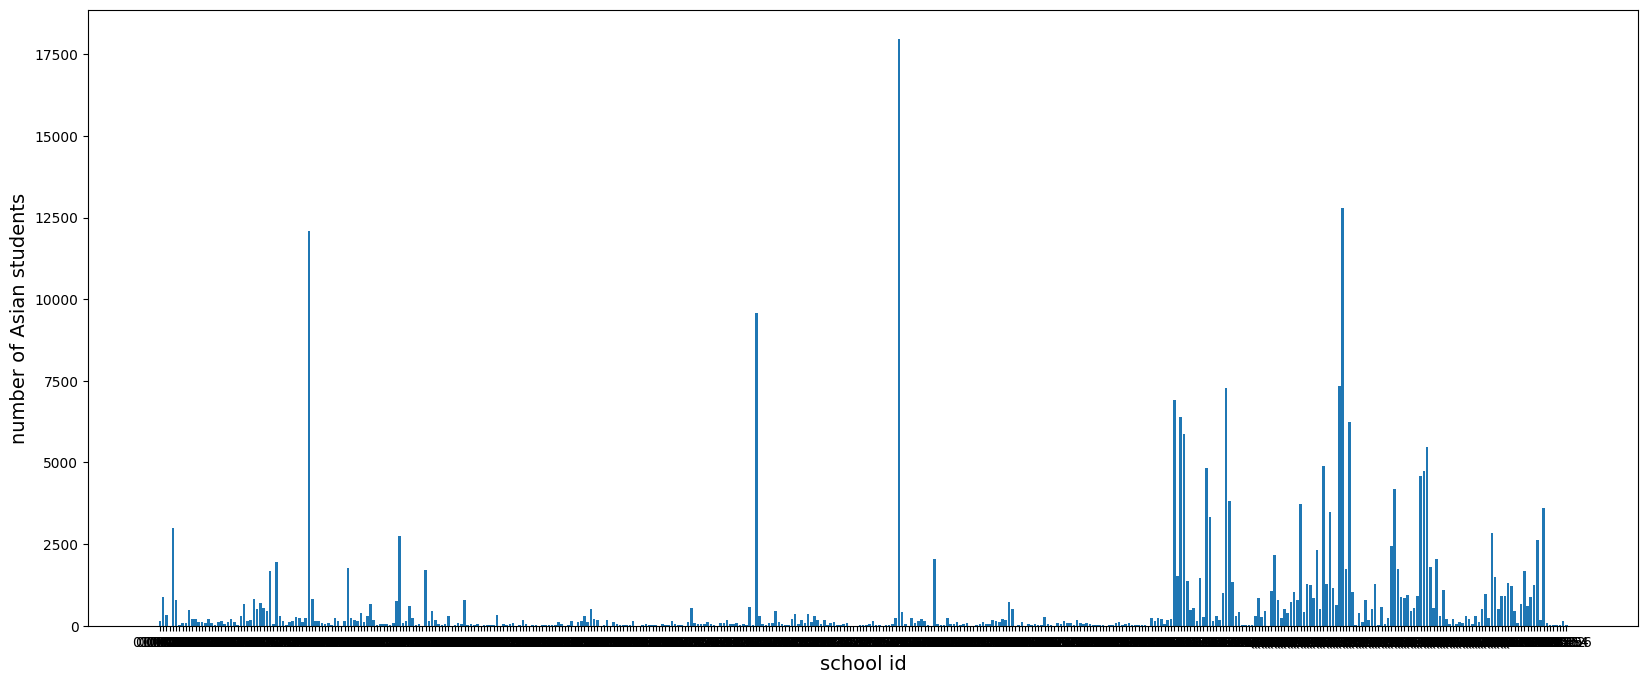

In [23]:
plt.figure(figsize=(20, 8))
# asian_per_school = asian_per_school.sort_values(by='# Asian', ascending=False)
plt.bar(asian_per_school['School ID'], asian_per_school['# Asian'])
plt.xticks(asian_per_school['School ID'])
plt.ylabel('number of Asian students', fontsize=14)
plt.xlabel('school id', fontsize=14)

Text(0.5, 0, 'school id')

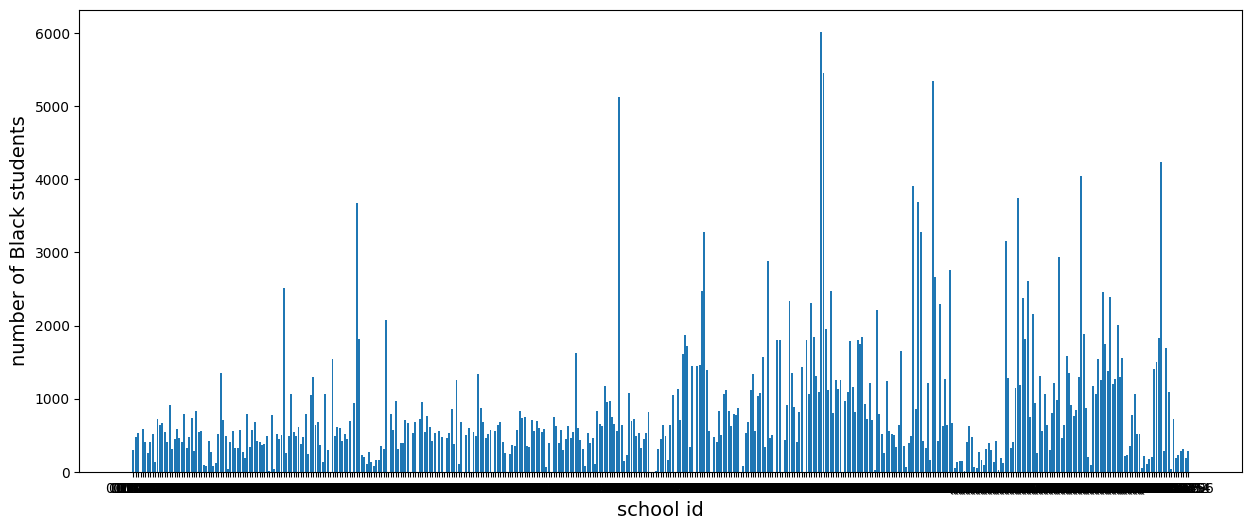

In [24]:
plt.figure(figsize=(15, 6))

plt.bar(black_per_school['School ID'], black_per_school['# Black'])
plt.xticks(black_per_school['School ID'])
plt.ylabel('number of Black students', fontsize=14)
plt.xlabel('school id', fontsize=14)

Text(0.5, 0, 'school id')

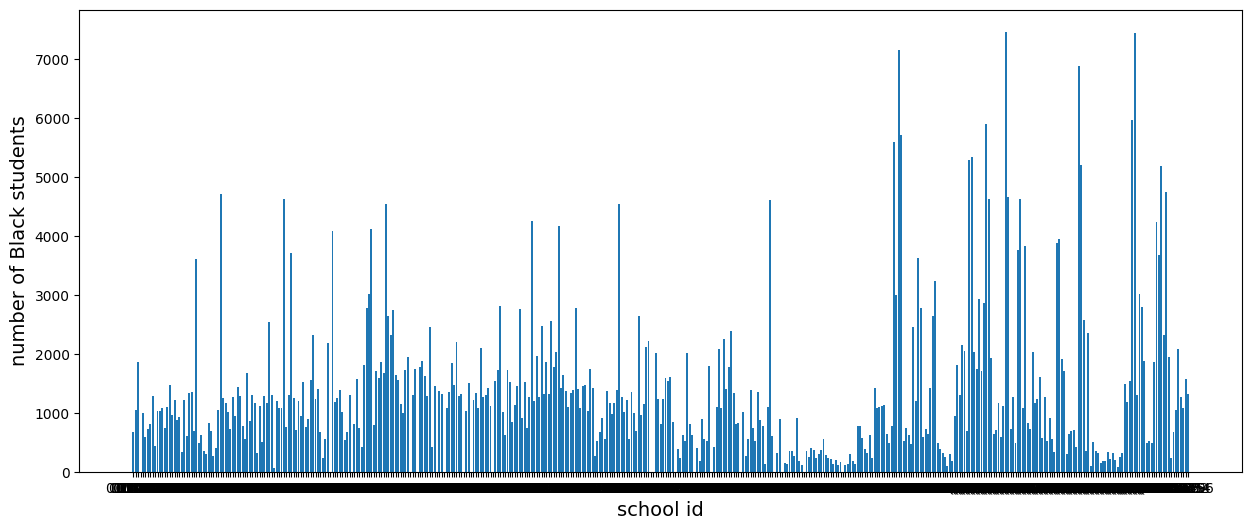

In [25]:
plt.figure(figsize=(15, 6))

plt.bar(hispanic_per_school['School ID'], hispanic_per_school['# Hispanic'])
plt.xticks(hispanic_per_school['School ID'])
plt.ylabel('number of Black students', fontsize=14)
plt.xlabel('school id', fontsize=14)

Text(0.5, 0, 'school id')

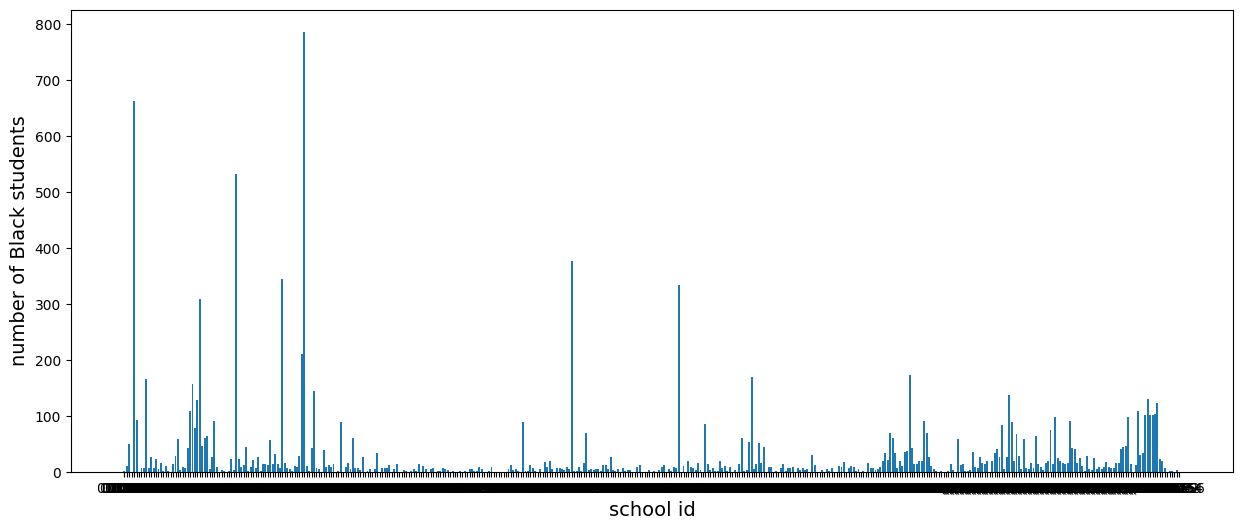

In [26]:
plt.figure(figsize=(15, 6))

plt.bar(multi_per_school['School ID'], multi_per_school['# Multi-Racial'])
plt.xticks(multi_per_school['School ID'])
plt.ylabel('number of Black students', fontsize=14)
plt.xlabel('school id', fontsize=14)

Text(0.5, 0, 'school id')

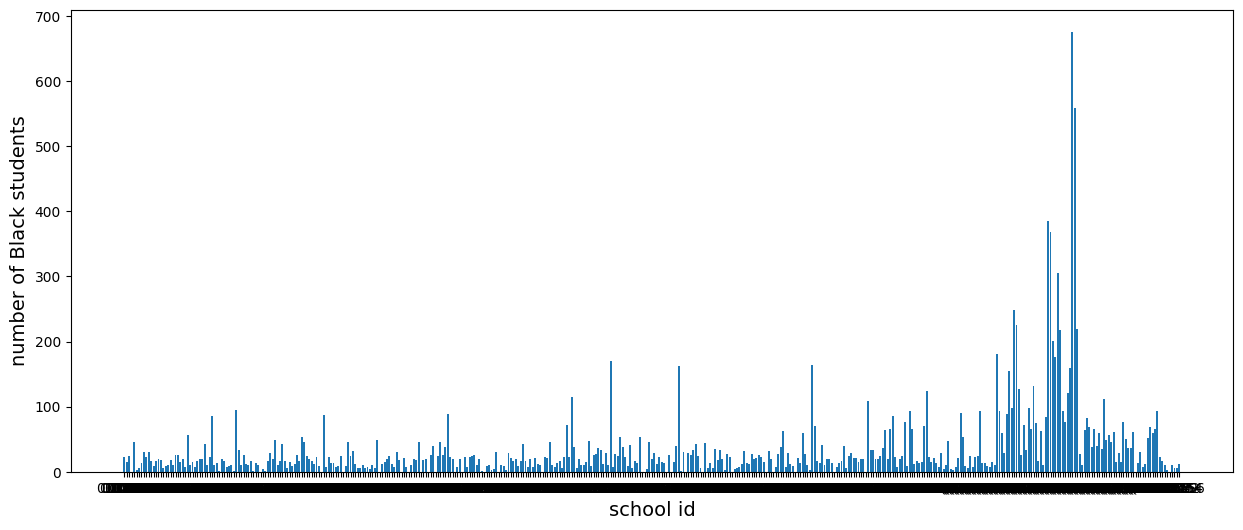

In [27]:
plt.figure(figsize=(15, 6))

plt.bar(native_per_school['School ID'], native_per_school['# Native American'])
plt.xticks(native_per_school['School ID'])
plt.ylabel('number of Black students', fontsize=14)
plt.xlabel('school id', fontsize=14)

# This type of bar charts gives us a rough idea that some schools are more diverse than others, since the school ID order/y-axis does not change across all charts. Therefore, it makes more sense to regroup the schools by some criteria first to make the graph more interesting.

## The frist thing we can do to reduce the amount of schools in y-axis is to group each school together (5 years together). This means we need to group the data by every 5 rows and take the numbers by mean

In [28]:

# Calculate the mean for each group of 5 rows
asian_per_school_updated = asian_per_school.groupby(asian_per_school.index // 5)['# Asian'].mean()

# Reset the index to make it a DataFrame
asian_per_school_updated = asian_per_school_updated.reset_index()

# Rename the columns for clarity
asian_per_school_updated.columns = ['School ID', 'Mean # Asian Students']
asian_per_school_updated
# print(asian_per_school)

,School ID,Mean # Asian Students
0,0,863.8
1,1,290.0
2,2,142.2
3,3,109.0
4,4,97.4
5,5,423.2
6,6,771.0
7,7,497.2
8,8,170.2
9,9,2686.0


Text(0.5, 0, 'school id')

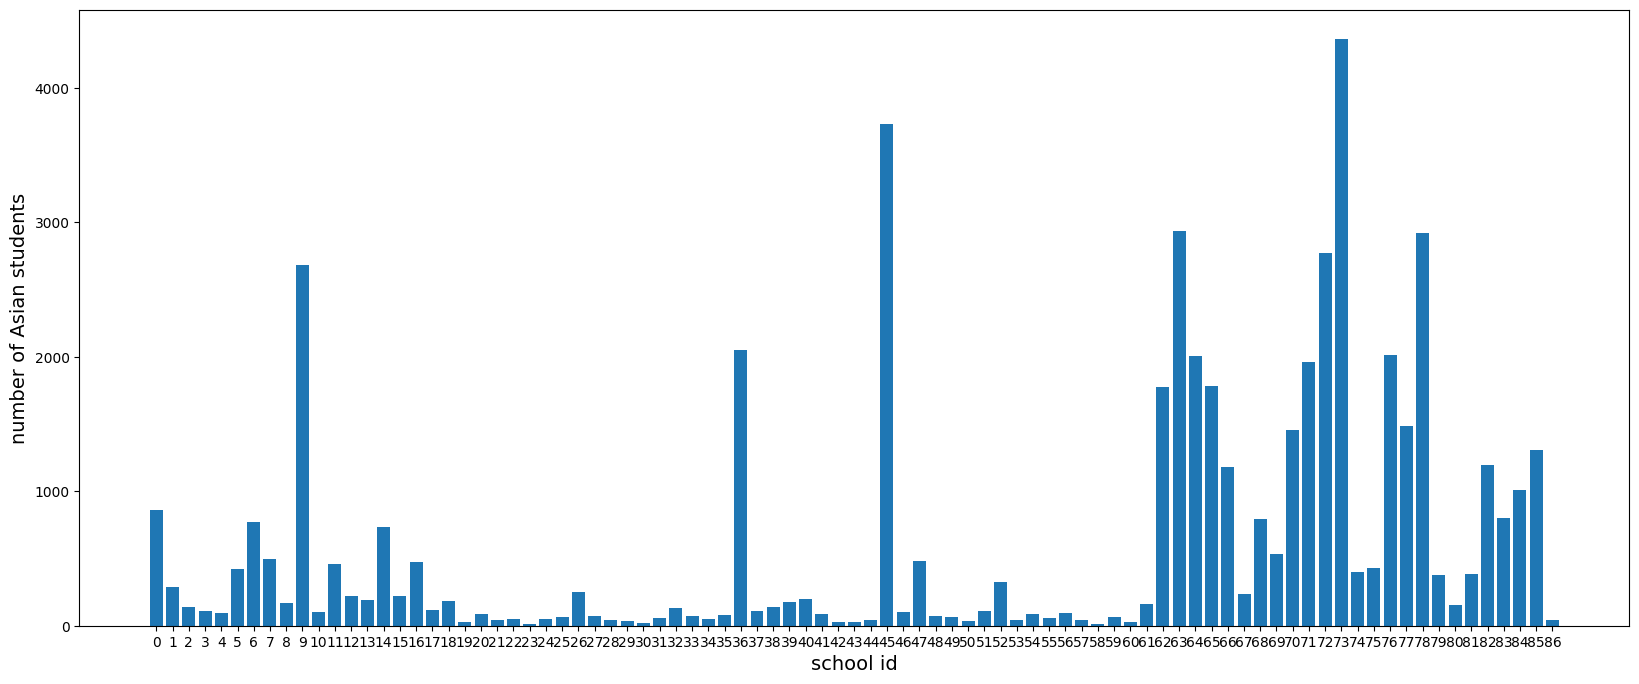

In [29]:
plt.figure(figsize=(20, 8))
# asian_per_school = asian_per_school.sort_values(by='# Asian', ascending=False)
plt.bar(asian_per_school_updated['School ID'], asian_per_school_updated['Mean # Asian Students'])
plt.xticks(asian_per_school_updated['School ID'])
plt.ylabel('number of Asian students', fontsize=14)
plt.xlabel('school id', fontsize=14)

In [30]:

# Calculate the mean for each group of 5 rows
black_per_school_updated = black_per_school.groupby(black_per_school.index // 5)['# Black'].mean()

# Reset the index to make it a DataFrame
black_per_school_updated = black_per_school_updated.reset_index()

# Rename the columns for clarity
black_per_school_updated.columns = ['School ID', 'Mean # Black Students']
black_per_school_updated
# print(asian_per_school)

,School ID,Mean # Black Students
0,0,377.0
1,1,342.0
2,2,596.6
3,3,547.8
4,4,544.8
5,5,462.0
6,6,194.0
7,7,620.8
8,8,436.2
9,9,431.4


Text(0.5, 0, 'school id')

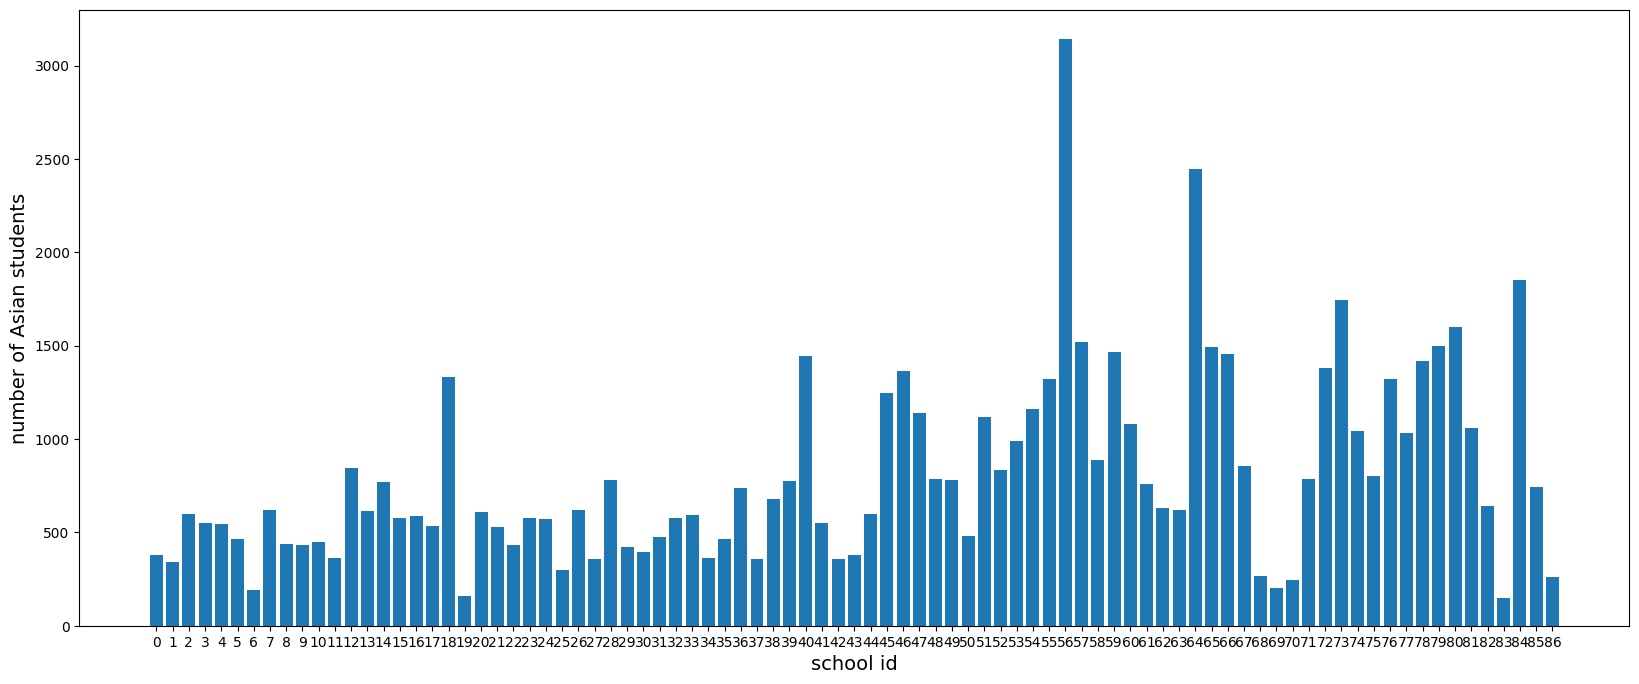

In [31]:
plt.figure(figsize=(20, 8))
# asian_per_school = asian_per_school.sort_values(by='# Asian', ascending=False)
plt.bar(black_per_school_updated['School ID'], black_per_school_updated['Mean # Black Students'])
plt.xticks(black_per_school_updated['School ID'])
plt.ylabel('number of Asian students', fontsize=14)
plt.xlabel('school id', fontsize=14)

In [32]:

# Calculate the mean for each group of 5 rows
hispanic_per_school_updated = hispanic_per_school.groupby(hispanic_per_school.index // 5)['# Hispanic'].mean()

# Reset the index to make it a DataFrame
hispanic_per_school_updated = hispanic_per_school_updated.reset_index()

# Rename the columns for clarity
hispanic_per_school_updated.columns = ['School ID', 'Mean # Hispanic Students']
hispanic_per_school_updated
# print(asian_per_school)

,School ID,Mean # Hispanic Students
0,0,915.2
1,1,768.8
2,2,996.6
3,3,1090.4
4,4,970.0
5,5,1151.4
6,6,497.8
7,7,1838.0
8,8,1133.2
9,9,1036.8


Text(0.5, 0, 'school id')

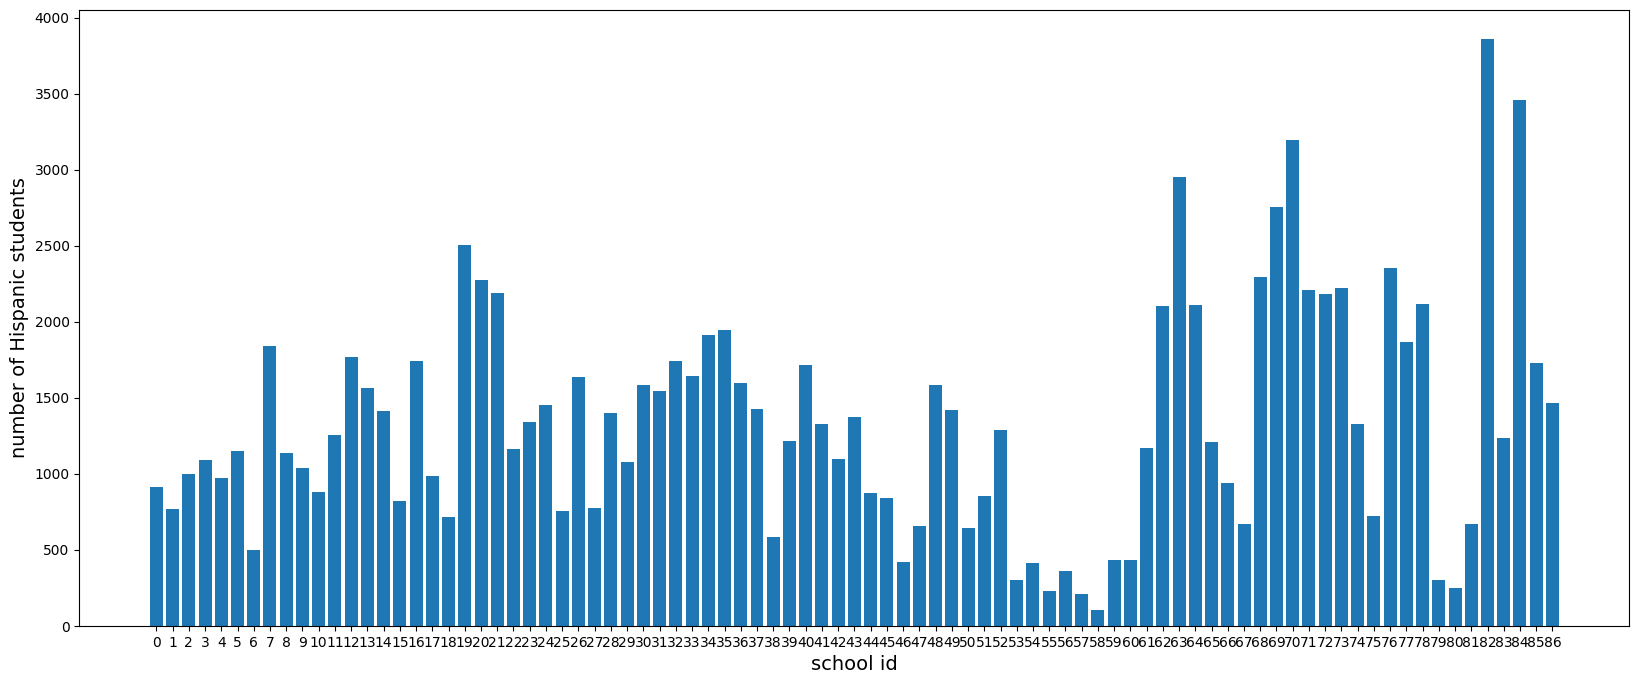

In [33]:
plt.figure(figsize=(20, 8))
# asian_per_school = asian_per_school.sort_values(by='# Asian', ascending=False)
plt.bar(hispanic_per_school_updated['School ID'], hispanic_per_school_updated['Mean # Hispanic Students'])
plt.xticks(hispanic_per_school_updated['School ID'])
plt.ylabel('number of Hispanic students', fontsize=14)
plt.xlabel('school id', fontsize=14)

In [34]:

# Calculate the mean for each group of 5 rows
multi_per_school_updated = multi_per_school.groupby(native_per_school.index // 5)['# Multi-Racial'].mean()

# Reset the index to make it a DataFrame
multi_per_school_updated = multi_per_school_updated.reset_index()

# Rename the columns for clarity
multi_per_school_updated.columns = ['School ID', 'Mean # Multi Racial Students']
multi_per_school_updated
# print(asian_per_school)

,School ID,Mean # Multi Racial Students
0,0,144.6
1,1,54.2
2,2,13.2
3,3,5.8
4,4,22.6
5,5,78.2
6,6,121.4
7,7,26.4
8,8,5.6
9,9,115.4


Text(0.5, 0, 'school id')

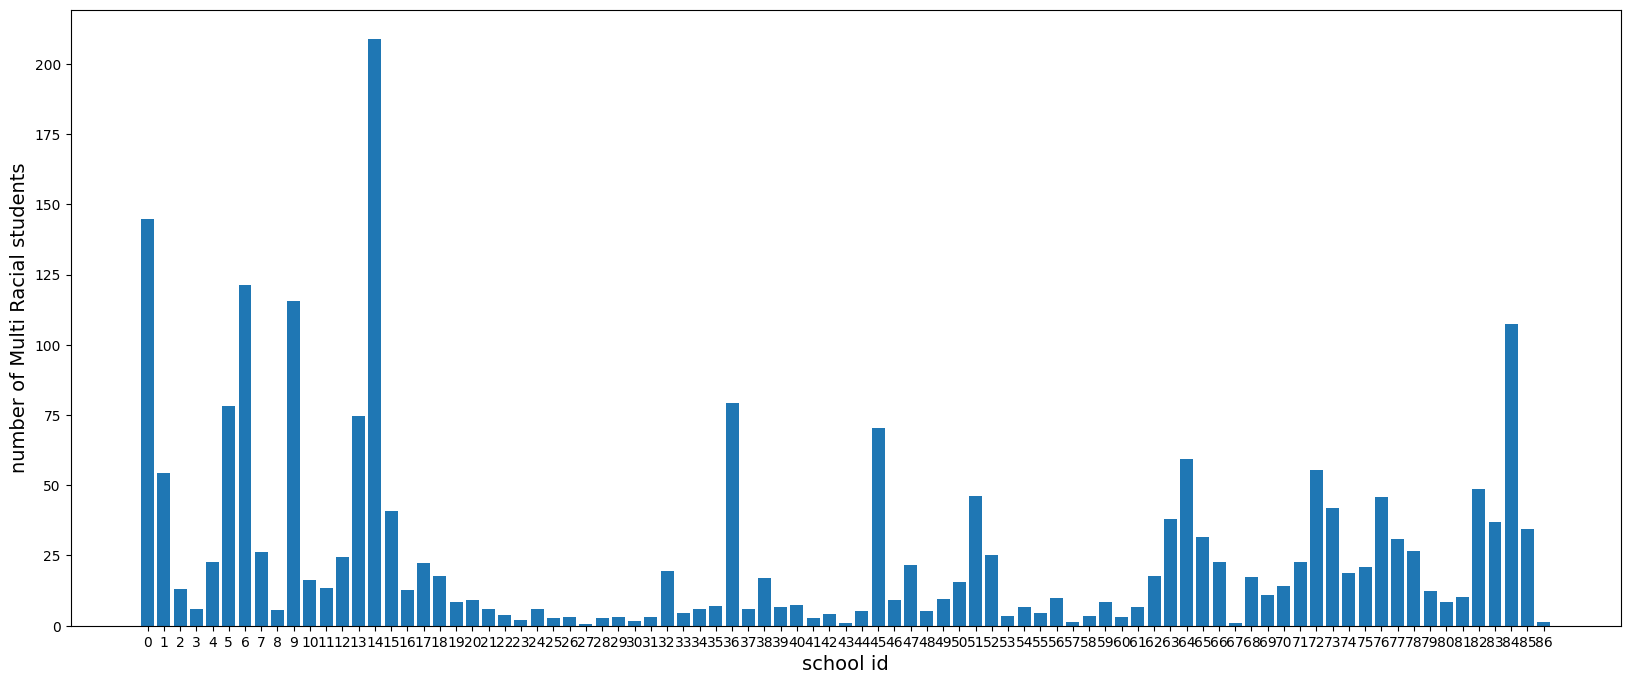

In [35]:
plt.figure(figsize=(20, 8))
# asian_per_school = asian_per_school.sort_values(by='# Asian', ascending=False)
plt.bar(multi_per_school_updated['School ID'], multi_per_school_updated['Mean # Multi Racial Students'])
plt.xticks(multi_per_school_updated['School ID'])
plt.ylabel('number of Multi Racial students', fontsize=14)
plt.xlabel('school id', fontsize=14)

In [36]:
# Calculate the mean for each group of 5 rows
native_per_school_updated = native_per_school.groupby(native_per_school.index // 5)['# Native American'].mean()

# Reset the index to make it a DataFrame
native_per_school_updated = native_per_school_updated.reset_index()

# Rename the columns for clarity
native_per_school_updated.columns = ['School ID', 'Mean # Native American Students']
native_per_school_updated
# print(asian_per_school)

,School ID,Mean # Native American Students
0,0,21.2
1,1,15.2
2,2,18.2
3,3,12.4
4,4,19.4
5,5,19.0
6,6,21.6
7,7,26.6
8,8,12.4
9,9,33.4


Text(0.5, 0, 'school id')

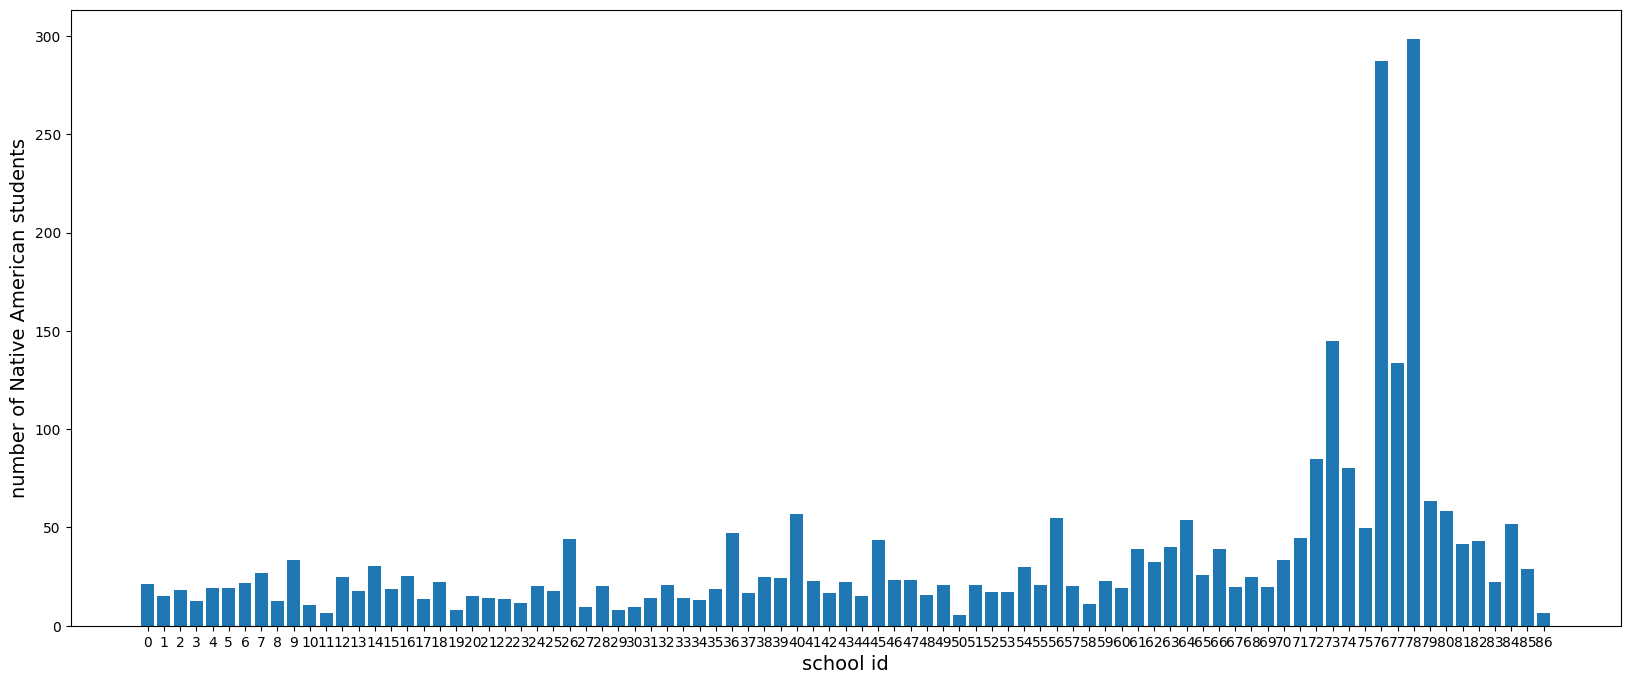

In [37]:
plt.figure(figsize=(20, 8))
# asian_per_school = asian_per_school.sort_values(by='# Asian', ascending=False)
plt.bar(native_per_school_updated['School ID'], native_per_school_updated['Mean # Native American Students'])
plt.xticks(native_per_school_updated['School ID'])
plt.ylabel('number of Native American students', fontsize=14)
plt.xlabel('school id', fontsize=14)

# 2. What are the mean, median (50%) of NYC public high schools' Asian, Black, Hispanic, Multi-Racial, and Native American students? Show them in a Bar Chart

In [38]:
data.columns

Index(['School ID', 'School Name_x', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'DBN', 'School Name_y',
       'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
   

In [39]:
native_summary = native_per_school_updated['Mean # Native American Students'].describe()
native_mean = native_summary.loc['mean']
native_median = native_summary.loc['50%']
native_mean, native_median, native_summary 

(34.70574712643678,
 21.2,
 count     87.000000
 mean      34.705747
 std       46.106205
 min        5.600000
 25%       16.100000
 50%       21.200000
 75%       36.100000
 max      298.400000
 Name: Mean # Native American Students, dtype: float64)

In [40]:
asian_summary = asian_per_school_updated['Mean # Asian Students'].describe()
asian_mean = asian_summary.loc['mean']
asian_median = asian_summary.loc['50%']
asian_mean, asian_median, asian_summary 

(604.2367816091952,
 170.2,
 count      87.000000
 mean      604.236782
 std       912.365392
 min        11.800000
 25%        64.700000
 50%       170.200000
 75%       752.900000
 max      4363.000000
 Name: Mean # Asian Students, dtype: float64)

In [41]:
black_summary = black_per_school_updated['Mean # Black Students'].describe()
black_mean = black_summary.loc['mean']
black_median = black_summary.loc['50%']
black_mean, black_median, black_summary 

(808.6022988505745,
 622.0,
 count      87.000000
 mean      808.602299
 std       514.536180
 min       150.400000
 25%       455.400000
 50%       622.000000
 75%      1069.900000
 max      3142.400000
 Name: Mean # Black Students, dtype: float64)

In [42]:
multi_summary = multi_per_school_updated['Mean # Multi Racial Students'].describe()
multi_mean = multi_summary.loc['mean']
multi_median = multi_summary.loc['50%']
multi_mean, multi_median, multi_summary 

(25.53793103448276,
 12.6,
 count     87.000000
 mean      25.537931
 std       35.115587
 min        0.600000
 25%        5.500000
 50%       12.600000
 75%       28.700000
 max      208.800000
 Name: Mean # Multi Racial Students, dtype: float64)

In [43]:
hispanic_summary = hispanic_per_school_updated['Mean # Hispanic Students'].describe()
hispanic_mean = hispanic_summary.loc['mean']
hispanic_median = hispanic_summary.loc['50%']
hispanic_mean, hispanic_median, hispanic_summary 

(1347.4045977011497,
 1257.2,
 count      87.000000
 mean     1347.404598
 std       757.066663
 min       105.400000
 25%       796.200000
 50%      1257.200000
 75%      1741.700000
 max      3858.800000
 Name: Mean # Hispanic Students, dtype: float64)

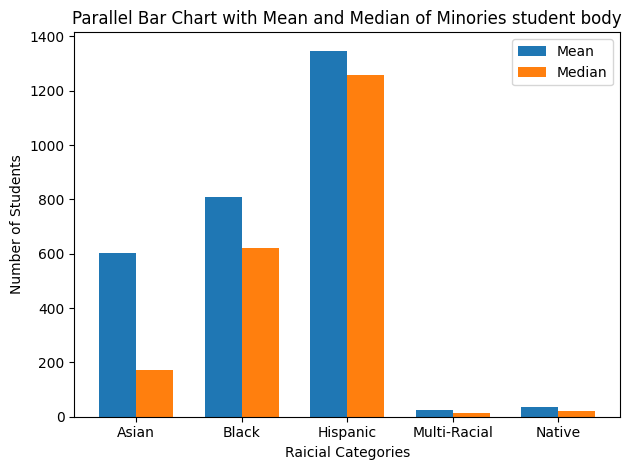

In [44]:
categories = ['Asian', 'Black', 'Hispanic', 'Multi-Racial', 'Native']
data1 = [asian_mean, black_mean, hispanic_mean, multi_mean, native_mean]  # Data for the first set of bars
data2 = [asian_median, black_median, hispanic_median, multi_median, native_median]  # Data for the second set of bars

# Set the width of the bars
bar_width = 0.35

# Create an array of x values for the bar positions
x = range(len(categories))

# Create the bar chart
plt.bar(x, data1, width=bar_width, label='Mean', align='center')
plt.bar([i + bar_width for i in x], data2, width=bar_width, label='Median', align='center')

# Customize the chart
plt.xlabel('Raicial Categories')
plt.ylabel('Number of Students')
plt.title('Parallel Bar Chart with Mean and Median of Minories student body')
plt.xticks([i + bar_width/2 for i in x], categories)
plt.legend()

# Show the chart
plt.tight_layout()  # Ensures that the labels are displayed properly
plt.show()

# 3. Is there any correlation between the percentage of Black and Hipanic students in a school and the # of Poverty? Do regression to show the relationship.

In [45]:
data.columns

Index(['School ID', 'School Name_x', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'DBN', 'School Name_y',
       'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
   

In [46]:
# Add a constant term for the intercept
X = data['# Black']
X = sm.add_constant(X)
y = data['# Poverty']

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              # Poverty   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     184.3
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.09e-39
Time:                        15:56:03   Log-Likelihood:                -9728.9
No. Observations:                1509   AIC:                         1.946e+04
Df Residuals:                    1507   BIC:                         1.947e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        317.1630      6.125     51.782      0.0

In [47]:
# Add a constant term for the intercept
X = data['# Black']
X = sm.add_constant(X)
y = data['# Poverty']

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              # Poverty   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     184.3
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.09e-39
Time:                        15:56:03   Log-Likelihood:                -9728.9
No. Observations:                1509   AIC:                         1.946e+04
Df Residuals:                    1507   BIC:                         1.947e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        317.1630      6.125     51.782      0.0

<Axes: xlabel='# Black', ylabel='# Poverty'>

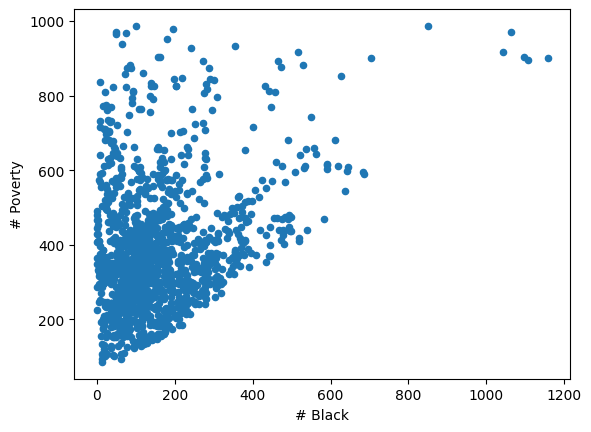

In [48]:
fig, ax = plt.subplots() #get axis to plot on
data.plot(ax=ax,kind='scatter',x='# Black', y='# Poverty')

In [49]:
# Add a constant term for the intercept
X = data['# Hispanic']
X = sm.add_constant(X)
y = data['# Poverty']

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              # Poverty   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     1319.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          4.80e-208
Time:                        15:56:03   Log-Likelihood:                -9341.5
No. Observations:                1509   AIC:                         1.869e+04
Df Residuals:                    1507   BIC:                         1.870e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.3134      5.390     40.692      0.0

<Axes: xlabel='# Hispanic', ylabel='# Poverty'>

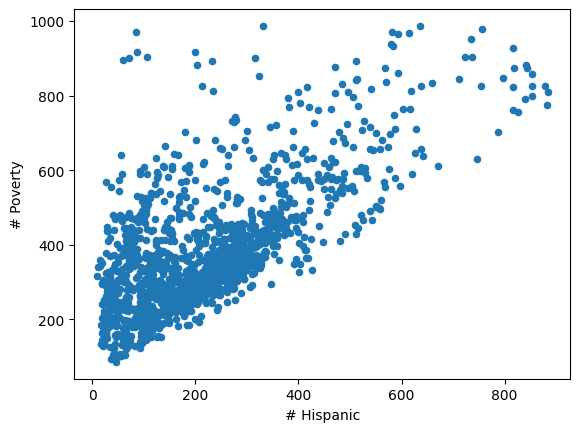

In [50]:
fig, ax = plt.subplots() #get axis to plot on
data.plot(ax=ax,kind='scatter',x='# Hispanic', y='# Poverty')

# Distribution visualize 2

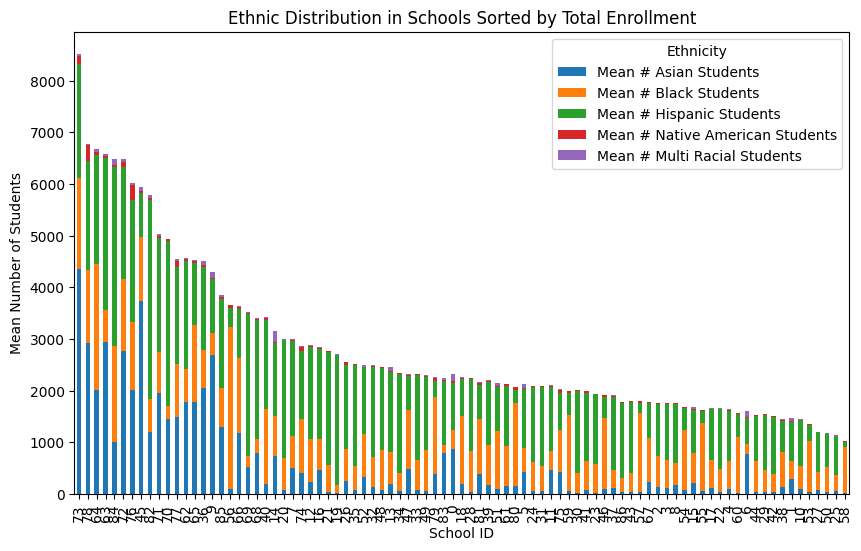

In [51]:
merged_data = asian_per_school_updated.merge(black_per_school_updated, on='School ID')
merged_data = merged_data.merge(hispanic_per_school_updated, on='School ID')
merged_data = merged_data.merge(native_per_school_updated, on='School ID')
merged_data = merged_data.merge(multi_per_school_updated, on='School ID')



# Calculate the total number of students for sorting
merged_data['Total Students'] = merged_data.sum(axis=1)

# Sorting by total number of students
merged_data = merged_data.sort_values(by='Total Students', ascending=False)

plt.figure(figsize=(10, 6))
merged_data.set_index('School ID').drop(columns='Total Students').plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Ethnic Distribution in Schools Sorted by Total Enrollment')
plt.xlabel('School ID')
plt.ylabel('Mean Number of Students')
plt.legend(title='Ethnicity', loc='upper right')
plt.show()

In [52]:
mean_variance_data = pd.DataFrame({
    'Ethnicity': ['Asian', 'Black', 'Hispanic', 'Native American','Multi'],
    'Mean Number of Students': [
        asian_per_school_updated['Mean # Asian Students'].mean(),
        black_per_school_updated['Mean # Black Students'].mean(),
        hispanic_per_school_updated['Mean # Hispanic Students'].mean(),
        native_per_school_updated['Mean # Native American Students'].mean(),
        multi_per_school_updated['Mean # Multi Racial Students'].mean()
    ],
    'Variance in Number of Students': [
        asian_per_school_updated['Mean # Asian Students'].var(),
        black_per_school_updated['Mean # Black Students'].var(),
        hispanic_per_school_updated['Mean # Hispanic Students'].var(),
        native_per_school_updated['Mean # Native American Students'].var(),
        multi_per_school_updated['Mean # Multi Racial Students'].var()
    ]
})

mean_variance_data

,Ethnicity,Mean Number of Students,Variance in Number of Students
0,Asian,604.236782,832410.608864
1,Black,808.602299,264747.480460
2,Hispanic,1347.404598,573149.932072
3,Native American,34.705747,2125.782176
4,Multi,25.537931,1233.104475


it is easy to see that even with lower mean comparing to black and hispanic group, asian group has an super high imbalance distribution in school (i.e. normally cluster together in some schools)

In [53]:
data

,School ID,School Name_x,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
10,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.399,9.0,0.005,140.0,0.081,14.0,0.008,415.0,23.9%,28.2%
11,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.397,24.0,0.014,150.0,0.086,28.0,0.016,430.0,24.5%,26.9%
12,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.388,0.0,0.000,176.0,0.097,23.0,0.013,433.0,24.0%,29.1%
13,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.381,5.0,0.003,224.0,0.125,34.0,0.019,430.0,24.0%,28.7%
14,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.393,5.0,0.003,208.0,0.127,26.0,0.016,386.0,23.5%,25.6%
15,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,0.059,21.0,0.062,87.0,0.256,12.0,0.035,239.0,70.3%,71.7%
16,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,0.100,14.0,0.041,92.0,0.271,12.0,0.035,231.0,68.1%,69.0%
17,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,0.139,10.0,0.030,87.0,0.257,11.0,0.033,225.0,66.6%,68.0%
18,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,0.159,13.0,0.035,97.0,0.262,10.0,0.027,251.0,67.8%,65.2%
19,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,0.198,10.0,0.028,93.0,0.263,8.0,0.023,230.0,65.2%,62.5%


In [54]:
ethnicity_columns = ['% White', '% Asian', '% Black', '% Hispanic', '% Native American', '% Multi-Racial', '% Poverty']
for col in ethnicity_columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.rstrip('%').astype('float') / 100

correlation_data = data[ethnicity_columns].corr()
poverty_correlation = correlation_data['% Poverty'].drop('% Poverty')
poverty_correlation

% White             -0.825807
% Asian             -0.393115
% Black              0.259105
% Hispanic           0.479512
% Native American    0.006057
% Multi-Racial      -0.716841
Name: % Poverty, dtype: float64

In [55]:
ethnicity_columns = ['% White', '% Asian', '% Black', '% Hispanic', '% Native American', '% Multi-Racial', '% Poverty', '% Missing Race/Ethnicity Data']
for col in ethnicity_columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.rstrip('%').astype('float') / 100

correlation_data = data[ethnicity_columns].corr()
poverty_correlation = correlation_data['% Poverty'].drop('% Poverty').drop('% Missing Race/Ethnicity Data')
print(poverty_correlation)
missing_data_correlation = correlation_data['% Missing Race/Ethnicity Data'].drop('% Poverty').drop('% Missing Race/Ethnicity Data')
print(missing_data_correlation)

% White             -0.825807
% Asian             -0.393115
% Black              0.259105
% Hispanic           0.479512
% Native American    0.006057
% Multi-Racial      -0.716841
Name: % Poverty, dtype: float64
% White              0.344057
% Asian              0.272118
% Black             -0.139241
% Hispanic          -0.288509
% Native American    0.108320
% Multi-Racial       0.271094
Name: % Missing Race/Ethnicity Data, dtype: float64


In [56]:
data.columns

Index(['School ID', 'School Name_x', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'DBN', 'School Name_y',
       'Year', 'Total Enrollment', 'Grade 3K',
       'Grade PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic', '# Multi-Racial', '% Multi-Racial',
       '# Native American', '% Native American', '# White', '% White',
       '# Missing Race/Ethnicity Data', '% Missing Race/Ethnicity Data',
   

In [57]:
ethinityAndSATScores = ['% White', '% Asian', '% Black', '% Hispanic', '% Native American', 
                      'Average Score (SAT Math)', 'Average Score (SAT Reading)', 
                      'Average Score (SAT Writing)', 'Percent Tested']
for col in ethinityAndSATScores:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col].str.replace('%', ''), errors='coerce')

correlation_data = data[ethinityAndSATScores].corr()
ethnicity_columns = ['% White', '% Asian', '% Black', '% Hispanic', '% Native American']
sat_and_tested_correlation = correlation_data.loc[ethnicity_columns, ['Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)', 'Percent Tested']]

sat_and_tested_correlation

,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
% White,0.637632,0.658672,0.666169,0.407516
% Asian,0.679286,0.515245,0.539461,0.460720
% Black,-0.398128,-0.268066,-0.300669,-0.256684
% Hispanic,-0.382987,-0.440054,-0.423945,-0.263284
% Native American,-0.029904,0.003173,-0.003824,-0.004951


In [60]:
api_schooldistrict = 'https://data.cityofnewyork.us/resource/cuae-wd7h.json'
response_schooldistrict = requests.get(api_schooldistrict)
schooldistrict_data = response_schooldistrict.json()
schooldistrict_data = pd.DataFrame(schooldistrict_data)